In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
X_train

# it's a 3d numpy array, there are 60k 2d arrays
# it is 28x28 matrix.

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_train[0]
# fetching the first item
# gives numpy 2d array
# 0 means black
# 255 side means white

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

9


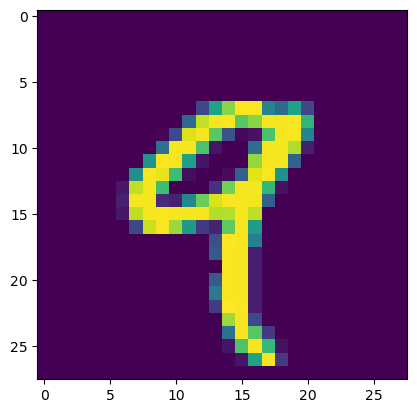

In [7]:
# show a specific image using imshow function
plt.imshow(X_train[4])

print(y_train[4])
# it gives label for particular image 

4


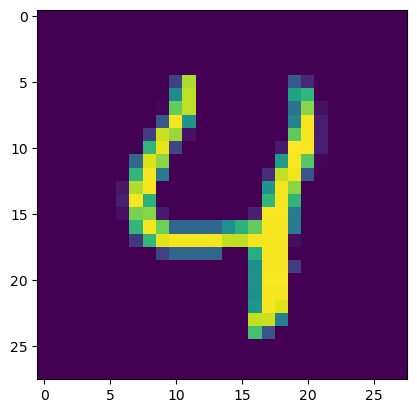

In [8]:
# similarly for test set

plt.imshow(X_test[4])
print(y_test[4])

In [9]:
# Scaler operation (converting values between 0 to 1)
X_train= X_train/255
X_test= X_test/255

In [10]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
model= Sequential()

In [12]:
# we've 28x28 matrix to convert into 1d its 28x28=784 using flatten
# now to solve this we need to convert 2d into 1d for easy processing

- The Flatten layer takes the multi-dimensional input (in this case, a 28x28 image) and converts it into a 1D vector.

- Dense layers perform the main learning by applying weights and an activation function to produce the final class probabilities.

In [13]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
# output layer
model.add(Dense(10,activation='softmax'))

C:\Users\maggi\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# we've categories ranging from 0 to 9 that's y used sparse_categorical_crossentropy


In [16]:
histroy=model.fit(X_train,y_train,batch_size=64,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8453 - loss: 0.5605 - val_accuracy: 0.9503 - val_loss: 0.1820
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9517 - loss: 0.1657 - val_accuracy: 0.9590 - val_loss: 0.1430
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9675 - loss: 0.1110 - val_accuracy: 0.9663 - val_loss: 0.1122
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9757 - loss: 0.0849 - val_accuracy: 0.9697 - val_loss: 0.1000
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9804 - loss: 0.0671 - val_accuracy: 0.9729 - val_loss: 0.0916
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9841 - loss: 0.0522 - val_accuracy: 0.9733 - val_loss: 0.0892
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9894 - loss: 0.0395 - val_accuracy: 0.9732 - val_loss: 0.0884
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9907 - loss: 0.0336 - val_accuracy: 0.

In [17]:
model.evaluate(X_test,y_test)
# 97.6% accuracy 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0949


[0.08098957687616348, 0.9760000109672546]

In [18]:
model.predict(X_test)
# you'll get array of 10 items

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[5.5881180e-09, 6.0866527e-11, 9.0165983e-08, ..., 9.9982184e-01,
        4.7266099e-08, 6.3373595e-06],
       [5.2430846e-09, 3.1632367e-06, 9.9994361e-01, ..., 9.4742848e-16,
        5.0678533e-05, 1.5949647e-14],
       [3.4138800e-06, 9.9708003e-01, 2.5515922e-04, ..., 1.9294697e-04,
        2.2990482e-03, 2.9518619e-06],
       ...,
       [1.9769260e-13, 9.5656760e-11, 7.3306405e-14, ..., 3.2305681e-07,
        5.7725869e-09, 1.0580111e-05],
       [3.1709897e-13, 4.5144650e-13, 2.1103470e-15, ..., 1.9556379e-12,
        5.2965260e-07, 2.8002947e-13],
       [2.7627853e-11, 5.9304178e-14, 1.2839545e-11, ..., 4.9157127e-17,
        2.2712835e-11, 9.9338029e-13]], dtype=float32)

In [19]:
# Get the predicted probabilities
predictions = model.predict(X_test)

# Convert the probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [20]:
print(predicted_classes)

[7 2 1 ... 4 5 6]


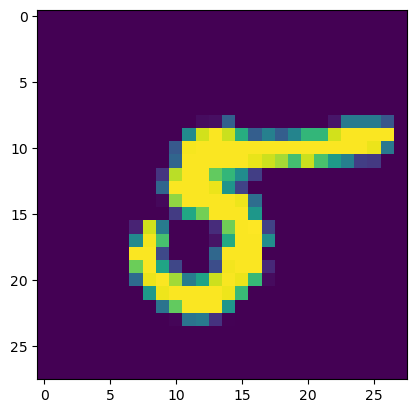

In [25]:
plt.imshow(X_test[-2])

# correct prediction

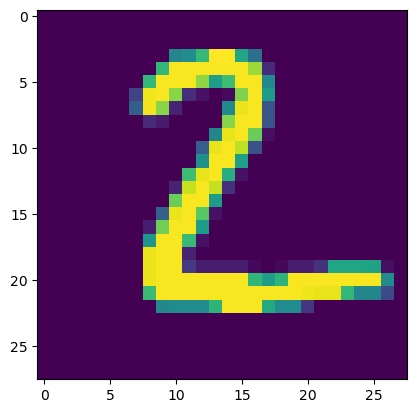

In [22]:
plt.imshow(X_test[1])

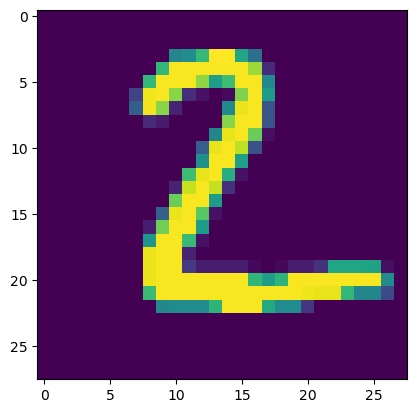

In [23]:
plt.imshow(X_test[1])